#EVALUACIÓN FINAL: ANÁLISIS DEL IMPACTO DEL CAMBIO CLIMÁTICO EN LA PRODUCCIÓN AGRÍCOLA
Eres un analista de datos en un centro de investigación sobre cambio climático y seguridad alimentaria. Te han encomendado evaluar cómo factores climáticos afectan la producción agrícola en distintos países. Para ello, aplicarás modelos de aprendizaje supervisado para predecir la producción de alimentos y clasificar los países según su vulnerabilidad.

##OBJETIVOS DE LA EVALUACIÓN
* Aplicar técnicas de regresión para predecir la producción agrícola en función de variables
climáticas.
* Utilizar algoritmos de clasificación para categorizar los países según el impacto del cambio
climático.
* Evaluar el desempeño de los modelos mediante métricas adecuadas.
* Aplicar preprocesamiento de datos para mejorar la calidad del análisis.
* Optimizar los modelos a través de técnicas de ajuste de hiperparámetros.

###INSTRUCCIONES
1. Carga y exploración de datos (1 punto)
* Carga el dataset proporcionado, que contiene información sobre temperatura media, cambio en las precipitaciones, frecuencia de sequías y producción agrícola en distintos países.
* Analiza la distribución de las variables y detecta posibles valores atípicos o tendencias.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
files.upload()

Saving cambio_climatico_agricultura.csv to cambio_climatico_agricultura (1).csv


{'cambio_climatico_agricultura (1).csv': b'Pa\xc3\xads,Temperatura_promedio,Cambio_lluvias,Frecuencia_sequ\xc3\xadas,Producci\xc3\xb3n_alimentos\r\nAlemania,10.5,-5,2,950000\r\nArgentina,17.8,-10,5,650000\r\nAustralia,22.3,-15,8,400000\r\nBrasil,25.1,-8,6,900000\r\nCanad\xc3\xa1,6.2,-2,1,850000\r\nChile,15.4,-12,7,500000\r\nEspa\xc3\xb1a,18.2,-9,6,600000\r\nEstados Unidos,12.8,-4,3,1200000\r\nFrancia,11.5,-6,2,980000\r\nItalia,13.4,-7,4,700000\r\nJap\xc3\xb3n,16.1,-3,1,720000\r\nM\xc3\xa9xico,22.9,-11,7,450000\r\nReino Unido,9.7,-4,2,820000\r\nRusia,5.4,-1,1,900000\r\nSud\xc3\xa1frica,20.5,-13,9,300000\r\nChina,14.7,-6,3,1100000\r\nIndia,26.9,-12,6,700000\r\nNoruega,4.6,-3,1,600000\r\nPer\xc3\xba,20.1,-11,5,550000\r\nTailandia,28.0,-14,7,480000\r\nEgipto,23.5,-8,8,370000\r\nCorea del Sur,13.8,-5,2,890000\r\nNueva Zelanda,15.3,-10,4,560000\r\n'}

In [38]:
# Creación y Visualización de primeras 5 filas del DataFrame e información sobre el tipo de data.
df = pd.read_csv('cambio_climatico_agricultura.csv')
display(df.head())
df.info()
df.describe()

,País,Temperatura_promedio,Cambio_lluvias,Frecuencia_sequías,Producción_alimentos
0,Alemania,10.5,-5,2,950000
1,Argentina,17.8,-10,5,650000
2,Australia,22.3,-15,8,400000
3,Brasil,25.1,-8,6,900000
4,Canadá,6.2,-2,1,850000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   País                  23 non-null     object 
 1   Temperatura_promedio  23 non-null     float64
 2   Cambio_lluvias        23 non-null     int64  
 3   Frecuencia_sequías    23 non-null     int64  
 4   Producción_alimentos  23 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.0+ KB


,Temperatura_promedio,Cambio_lluvias,Frecuencia_sequías,Producción_alimentos
count,23.000000,23.000000,23.000000,2.300000e+01
mean,16.291304,-7.782609,4.347826,7.030435e+05
std,6.692256,4.055933,2.604344,2.410665e+05
min,4.600000,-15.000000,1.000000,3.000000e+05
25%,12.150000,-11.000000,2.000000,5.250000e+05
50%,15.400000,-8.000000,4.000000,7.000000e+05
75%,21.400000,-4.500000,6.500000,8.950000e+05
max,28.000000,-1.000000,9.000000,1.200000e+06


In [39]:
# Identificación de Nulos, y eliminación en caso de existencia
if df.isnull().values.any():
  print("Hay valores nulos")
  print(df.isnull().sum())
  df.dropna(inplace=True)
else:
  print("No hay valores nulos")

No hay valores nulos


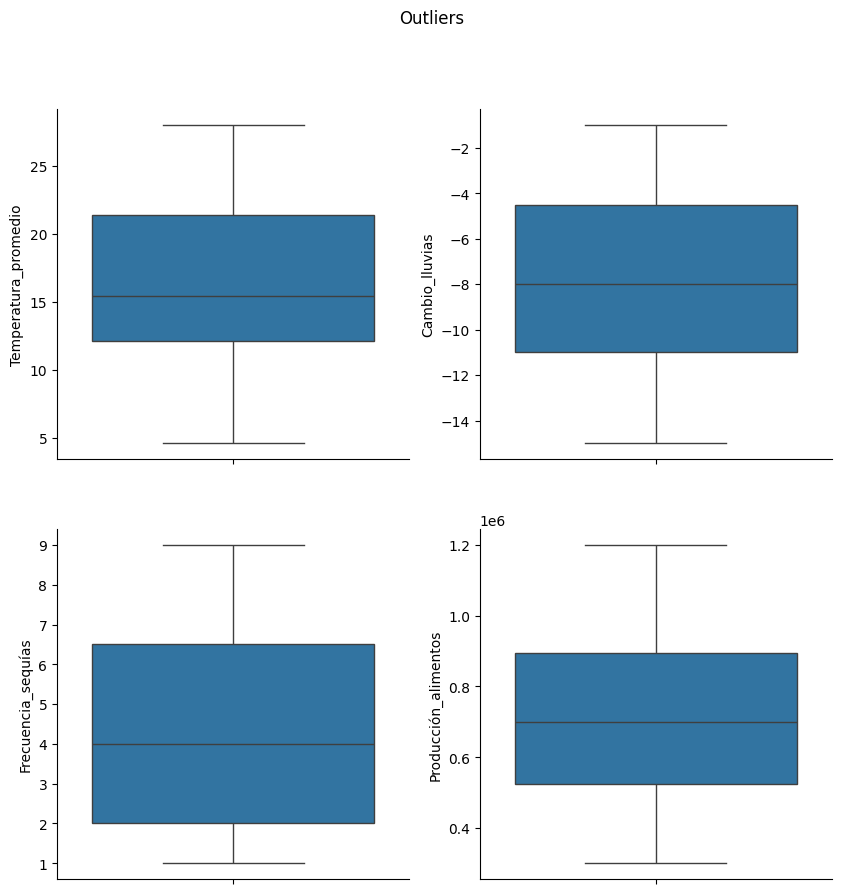

Como se aprecia en la gráfica de Outliers, no existe ningun valor que deba este fuera de los limites inferior y superior, por lo que los datos no necesitan ser modificados


In [40]:
# Identificación de Outliers, y eliminación en caso de existencia

fig, axes = plt.subplots(2,2,figsize=(10,10))
sns.boxplot(df['Temperatura_promedio'],ax=axes[0,0])
sns.boxplot(df['Cambio_lluvias'],ax=axes[0,1])
sns.boxplot(df['Frecuencia_sequías'],ax=axes[1,0])
sns.boxplot(df['Producción_alimentos'],ax=axes[1,1])
sns.despine()
fig.suptitle('Outliers')
plt.show()

print(f"Como se aprecia en la gráfica de Outliers, no existe ningun valor que deba este fuera de los limites inferior y superior, por lo que los datos no necesitan ser modificados")

In [41]:
# Identificación de valores duplicados, y eliminación en caso de existencia
if df.duplicated().sum() == 0:
    print("No hay valores duplicados")
else:
    print("Hay valores duplicados")
    print("Número de valores duplicados: ", df.duplicated().sum())
    print("Valores duplicados: ", df[df.duplicated()])
    df.drop_duplicates(inplace=True)

No hay valores duplicados


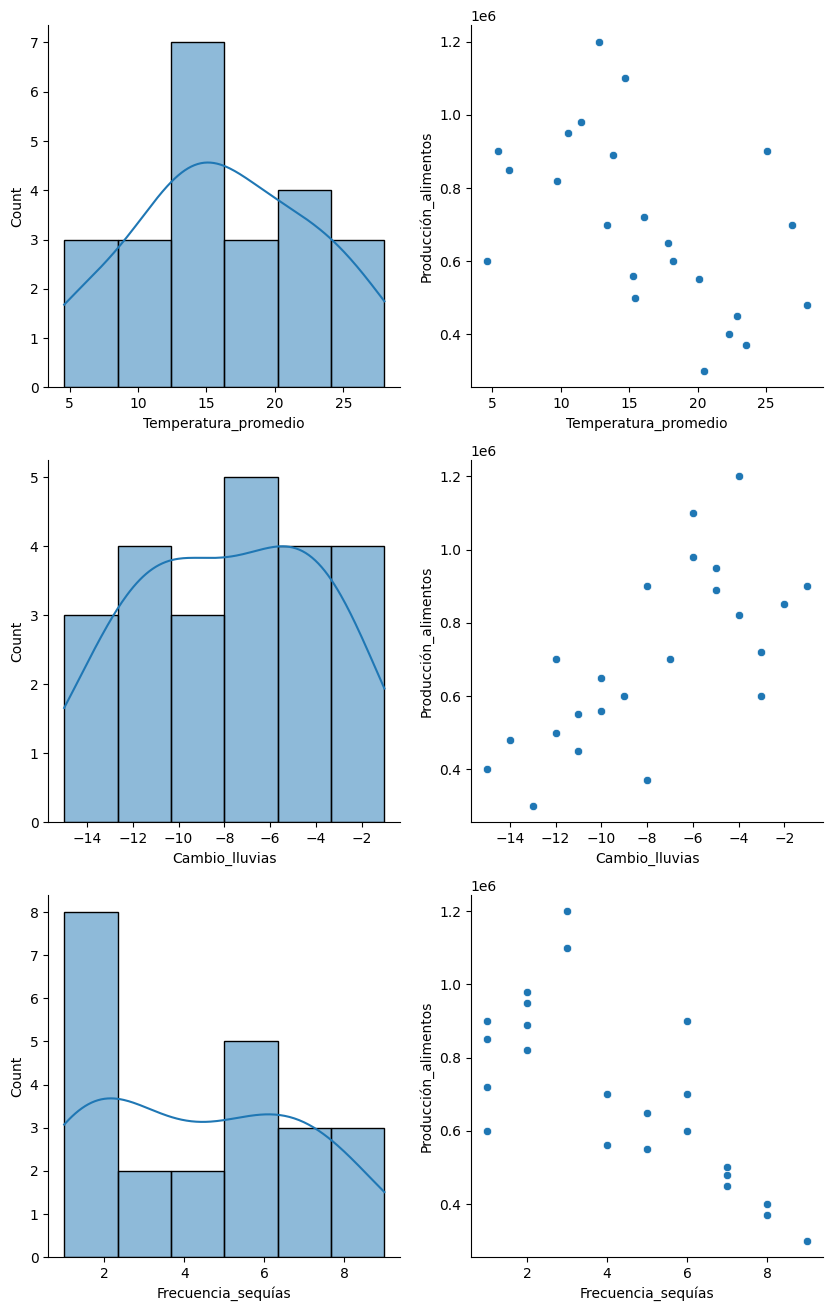

In [42]:
# Distribución de las variables y detección de posibles valores atípicos o tendencias

axes,fig = plt.subplots(3,2,figsize=(10,16))
sns.histplot(data=df, x='Temperatura_promedio', ax=fig[0,0], kde=True)
sns.scatterplot(data=df, x='Temperatura_promedio', y='Producción_alimentos', ax=fig[0,1])
sns.histplot(data=df, x='Cambio_lluvias', ax=fig[1,0], kde=True)
sns.scatterplot(data=df, x='Cambio_lluvias', y='Producción_alimentos', ax=fig[1,1])
sns.histplot(data=df, x='Frecuencia_sequías', ax=fig[2,0], kde=True)
sns.scatterplot(data=df, x='Frecuencia_sequías', y='Producción_alimentos', ax=fig[2,1])
sns.despine()
plt.show()

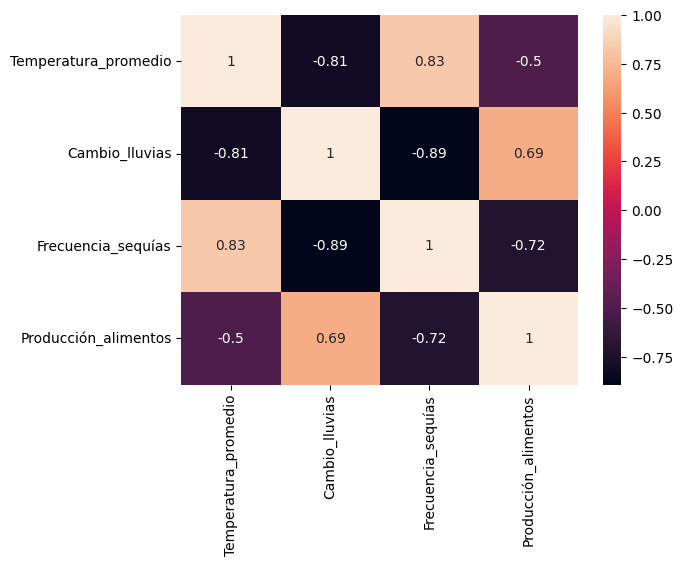

In [43]:
#Heatmap para evaluar posible relación lineal entre variables

corr = df.drop('País', axis=1).corr()
sns.heatmap(corr, annot=True)
plt.show()

In [44]:
from IPython.display import display, Markdown

exploracion = f"""
##Exploración de datos

Durante la exploración de datos se identificó que **NO EXISTEN** valores duplicados, nulos o  outliers, por lo que el dataset no debe ser modificado para el análisis.

En el Heatmap de correlación se aprecia que la variable "Producción_alimentos" y "Frecuencia_sequías" tienen una correlación alta, pero negativa de -0,79 (a medida que las sequías aumentan la producción de alimentos disminuye). Algo similar ocurre entre "Producción_alimentos" y "Temperatura_promedio" ya que tienen una correlacion moderada y negativa de -0,5, es decir a medida que la temperatura promedio del lugar aumenta la producción de alimentos disminuye. Finalmente se tiene que la relación entre "Producción_alimentos" y "Cambio_lluvias" es moderada y positiva de 0,5 indicando que a medida que aumenta el cambio en las precipitaciones la producción de alimentos aumenta.

Finalmente, se encontró en el dataset que la única variable categórica es "País", pero se considera que para los análisis que vienen a continuación no es necesario contar con esta variable, por lo que no se hará ninguna modificación en ella y solo se mantendra fuera del análisis.

"""

display(Markdown(exploracion))


##Exploración de datos

Durante la exploración de datos se identificó que **NO EXISTEN** valores duplicados, nulos o  outliers, por lo que el dataset no debe ser modificado para el análisis.

En el Heatmap de correlación se aprecia que la variable "Producción_alimentos" y "Frecuencia_sequías" tienen una correlación alta, pero negativa de -0,79 (a medida que las sequías aumentan la producción de alimentos disminuye). Algo similar ocurre entre "Producción_alimentos" y "Temperatura_promedio" ya que tienen una correlacion moderada y negativa de -0,5, es decir a medida que la temperatura promedio del lugar aumenta la producción de alimentos disminuye. Finalmente se tiene que la relación entre "Producción_alimentos" y "Cambio_lluvias" es moderada y positiva de 0,5 indicando que a medida que aumenta el cambio en las precipitaciones la producción de alimentos aumenta.

Finalmente, se encontró en el dataset que la única variable categórica es "País", pero se considera que para los análisis que vienen a continuación no es necesario contar con esta variable, por lo que no se hará ninguna modificación en ella y solo se mantendra fuera del análisis.



2. Preprocesamiento y escalamiento de datos (2 puntos)
* Aplica técnicas de normalización o estandarización a las variables numéricas.
* Codifica correctamente cualquier variable categórica si fuera necesario.
* Divide los datos en conjunto de entrenamiento y prueba (80%-20%).

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder

In [46]:
# Separar variables
X = df.drop(['Producción_alimentos','País'], axis=1)
y = df['Producción_alimentos']

# Estandarizar variables
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)
y_scaler = scaler.fit_transform(y.values.reshape(-1, 1))

# Dividir datos en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(X_scaler, y_scaler, test_size=0.25, random_state=42)

print("X_train: ", x_train.shape)
print("X_test: ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (17, 3)
X_test:  (6, 3)
y_train:  (17, 1)
y_test:  (6, 1)


3. Aplicación de modelos de aprendizaje supervisado (4 puntos)
* Regresión:
    * Entrena un modelo de regresión lineal para predecir la producción de alimentos.
    * Evalúa el modelo usando métricas como MAE, MSE y R2.
    * Compara con otros modelos de regresión (árbol de decisión, random forest).


In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Modelo de Regresión Lineal
mlr = LinearRegression()
mlr.fit(x_train, y_train)
y_pred_lr = mlr.predict(x_test)

# MAE, MSE, R2
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Modelo de Regresión Lineal")
print("MAE: ", mae_lr)
print("MSE: ", mse_lr)
print("R2: ", r2_lr)


Modelo de Regresión Lineal
MAE:  0.6406560529389264
MSE:  0.6541420452905068
R2:  -0.2475080535756411


In [48]:
# Modelo árbol de decisión

from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
y_pred_dt = dtr.predict(x_test)

# MAE, MSE, R2
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Modelo de Árboles de Decisión")
print("MAE: ", mae_dt)
print("MSE: ", mse_dt)
print("R2: ", r2_dt)

Modelo de Árboles de Decisión
MAE:  0.9543293604299773
MSE:  1.419712046395422
R2:  -1.7075192985800056


In [49]:
# Modelo random forest

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train, y_train.ravel()) # Apply .ravel() here
y_pred_rf = rfr.predict(x_test)

# MAE, MSE, R2
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Modelo de Random Forest")
print("MAE: ", mae_rf)
print("MSE: ", mse_rf)
print("R2: ", r2_rf)

Modelo de Random Forest
MAE:  0.7078296211841003
MSE:  0.7247115482408996
R2:  -0.3820904793671951


In [65]:
from IPython.display import display, Markdown

comparacion_regresion= f"""
##Comparación de modelos

| Modelo | MAE | MSE | $R^2$ |
|--------|-----|-----|----|
| Regresión Lineal | {mae_lr:.2f} | {mse_lr:.2f} | {r2_lr:.2f} |
| Árbol de Decisión | {mae_dt:.2f} | {mse_dt:.2f} | {r2_dt:.2f} |
| Random Forest | {mae_rf:.2f} | {mse_rf:.2f} | {r2_rf:.2f}|

Como se aprecia en la tabla anterior, los valores del error absoluto medio (MAE) y del error cuadratico medio (MSE) para los 3 modelos son valores pequeños, pero al evaluar el $R^2$ de cada modelo, se puede inferir que ninguno de los modelos generados se ajusta de buena manera para poder predecir la producción de alimentos debido a el cambio climático. Esto se debe a que los puntajes $R^2$ negativos sugieren que estos modelos, en su estado actual, no están funcionando bien para predecir la producción de alimentos basándose en las características proporcionadas.

Lo anterior podría deberse a varios factores, incluyendo la cantidad limitada de datos (23 filas de datos es muy poco para evaluar modelos), que los modelos elegidos no sean adecuados para las relaciones existentes en los datos, o la necesidad de ingeniería de características adicionales o ajuste del modelo por medio de los hiperparámetros asociados a cada modelo utilizado (Esto se desarrollará mejor en el punto 3 de este trabajo).
"""
display(Markdown(comparacion_regresion))


##Comparación de modelos

| Modelo | MAE | MSE | $R^2$ |
|--------|-----|-----|----|
| Regresión Lineal | 0.64 | 0.65 | -0.25 |
| Árbol de Decisión | 0.95 | 1.42 | -1.71 |
| Random Forest | 0.71 | 0.72 | -0.38|

Como se aprecia en la tabla anterior, los valores del error absoluto medio (MAE) y del error cuadratico medio (MSE) para los 3 modelos son valores pequeños, pero al evaluar el $R^2$ de cada modelo, se puede inferir que ninguno de los modelos generados se ajusta de buena manera para poder predecir la producción de alimentos debido a el cambio climático. Esto se debe a que los puntajes $R^2$ negativos sugieren que estos modelos, en su estado actual, no están funcionando bien para predecir la producción de alimentos basándose en las características proporcionadas.

Lo anterior podría deberse a varios factores, incluyendo la cantidad limitada de datos (23 filas de datos es muy poco para evaluar modelos), que los modelos elegidos no sean adecuados para las relaciones existentes en los datos, o la necesidad de ingeniería de características adicionales o ajuste del modelo por medio de los hiperparámetros asociados a cada modelo utilizado (Esto se desarrollará mejor en el punto 3 de este trabajo).


* Clasificación:
    * Crea una nueva variable categórica que clasifique los países en "Bajo", "Medio" y "Alto" impacto climático en la producción agrícola.
    * Entrena modelos de clasificación como K-Nearest Neighbors, Árbol de Decisión y Support Vector Machine.
    * Evalúa el desempeño usando matriz de confusión, precisión, sensibilidad y curva ROC-AUC.

In [51]:
# Crear una nueva variable categorica para medir el impacto climático

# Definir los quantiles para la categorización
low_impact_threshold = df['Producción_alimentos'].quantile(0.33)
high_impact_threshold = df['Producción_alimentos'].quantile(0.66)

# Función para clasificar los paises basandose en la producción de alimentos
def classify_impact(production):
    if production <= low_impact_threshold:
        return 'Alto' # Baja producción implica alto impacto climático
    elif production <= high_impact_threshold:
        return 'Medio'
    else:
        return 'Bajo' # Alta producción implica bajo impacto climático

# Aplicar la función de clasificación para crear la nueva columna en el DataFrame
df['Impacto_climatico'] = df['Producción_alimentos'].apply(classify_impact)

# Mostrar cuantos paises estan en cada nueva categoría
display(df['Impacto_climatico'].value_counts())

# Muestra el DataFrame con la nueva columna
display(df.head())

,count
Impacto_climatico,
Bajo,8
Alto,8
Medio,7


,País,Temperatura_promedio,Cambio_lluvias,Frecuencia_sequías,Producción_alimentos,Impacto_climatico
0,Alemania,10.5,-5,2,950000,Bajo
1,Argentina,17.8,-10,5,650000,Medio
2,Australia,22.3,-15,8,400000,Alto
3,Brasil,25.1,-8,6,900000,Bajo
4,Canadá,6.2,-2,1,850000,Bajo


In [52]:
#Cargar librerias necesarias para entrenamiento de modelos de clasificación
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc


In [53]:
# Definir variables
X_cls = df.drop(['Producción_alimentos', 'País', 'Impacto_climatico'], axis=1)
y_cls = df['Impacto_climatico']

# LabelEncoder para categorizar la variable a estudiar
label_encoder = LabelEncoder()
y_cls_encoded = label_encoder.fit_transform(y_cls)

#Escalar variable X
scaler = StandardScaler()
X_cls_scaled = scaler.fit_transform(X_cls)

# Separar la data entre data para entrenamiento y testeo
X_train_cls_scaled, X_test_cls_scaled, y_train_cls, y_test_cls = train_test_split(X_cls_scaled, y_cls_encoded, test_size=0.25, stratify=y_cls_encoded, random_state=42)

print("X_train: ", X_train_cls_scaled.shape)
print("X_test: ", X_test_cls_scaled.shape)
print("y_train: ", y_train_cls.shape)
print("y_test: ", y_test_cls.shape)

X_train:  (17, 3)
X_test:  (6, 3)
y_train:  (17,)
y_test:  (6,)


--- KNN ---


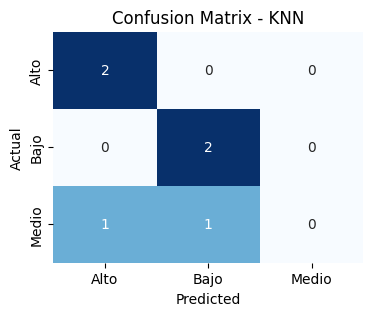

Accuracy: 0.6666666666666666
Precision: 0.7777777777777777
Recall: 0.6666666666666666
--------------------


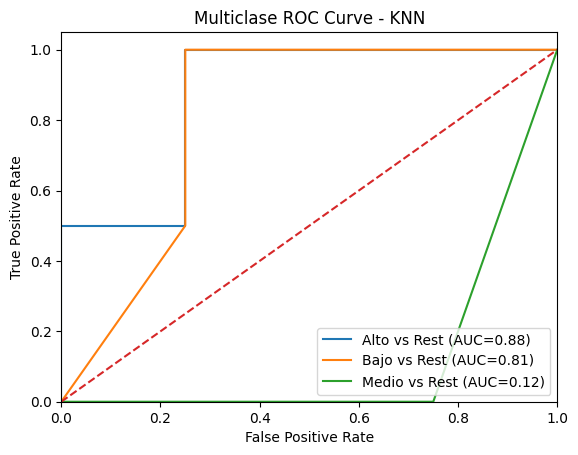

In [54]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train_cls_scaled, y_train_cls)
y_pred_knn = knn.predict(X_test_cls_scaled)
y_pred_proba_knn = knn.predict_proba(X_test_cls_scaled)

# Función que genera gráfica de matriz confusion
def cm(model,y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    label=label_encoder.inverse_transform(np.unique(y_test))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',cbar = False, xticklabels=label, yticklabels=label)
    plt.title(f'Confusion Matrix - {model}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    return cm

# Evalúa el desempeño usando matriz de confusión, precisión y sensibilidad.
knn_score = knn.score(X_test_cls_scaled, y_test_cls)
knn_accuracy = accuracy_score(y_test_cls, y_pred_knn)
knn_precision = precision_score(y_test_cls, y_pred_knn, average='weighted', zero_division=1)
knn_recall = recall_score(y_test_cls, y_pred_knn, average='weighted', zero_division=1)

print(f"--- KNN ---")
cm("KNN",y_test_cls, y_pred_knn)
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("-" * 20)

#ROC-AUC Curve
classes = np.unique(y_test_cls)
y_binarized_test_cls = label_binarize(y_test_cls, classes=classes)


#ROC Curve for classes
fpr = {}
tpr = {}
thresh = {}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_binarized_test_cls[:,i], y_pred_proba_knn[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    #Gráficar
    plt.plot(fpr[i], tpr[i], label=f'{label_encoder.inverse_transform([classes[i]])[0]} vs Rest (AUC={roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], '--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.title('Multiclase ROC Curve - KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

--- Decision Tree ---


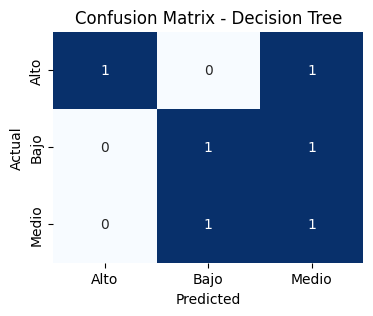

Accuracy: 0.5
Precision: 0.611111111111111
Recall: 0.5
--------------------


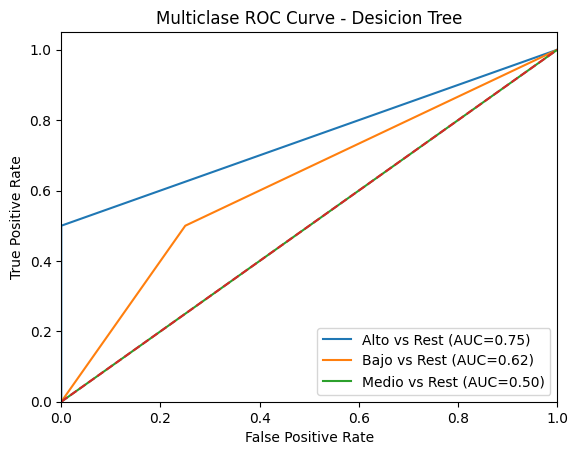

In [55]:
#Árbol de Decisión
dtc = DecisionTreeClassifier()
dtc.fit(X_train_cls_scaled, y_train_cls)
y_pred_dtc = dtc.predict(X_test_cls_scaled)
y_pred_proba_dtc = dtc.predict_proba(X_test_cls_scaled)

# Evalúa el desempeño usando matriz de confusión, precisión y sensibilidad
dtc_score = dtc.score(X_test_cls_scaled, y_test_cls)
dtc_accuracy = accuracy_score(y_test_cls, y_pred_dtc)
dtc_precision = precision_score(y_test_cls, y_pred_dtc, average='weighted', zero_division=1)
dtc_recall = recall_score(y_test_cls, y_pred_dtc, average='weighted', zero_division=1)

print(f"--- Decision Tree ---")
cm("Decision Tree",y_test_cls, y_pred_dtc)
print("Accuracy:", dtc_accuracy)
print("Precision:", dtc_precision)
print("Recall:", dtc_recall)
print("-" * 20)

#ROC Curve for classes
for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_binarized_test_cls[:,i], y_pred_proba_dtc[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    #Gráficar
    plt.plot(fpr[i], tpr[i], label=f'{label_encoder.inverse_transform([classes[i]])[0]} vs Rest (AUC={roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], '--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.title('Multiclase ROC Curve - Desicion Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

--- SVM ---


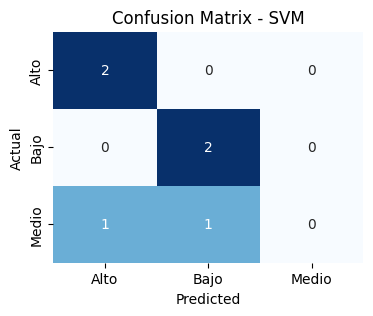

Accuracy: 0.6666666666666666
Precision: 0.7777777777777777
Recall: 0.6666666666666666
--------------------


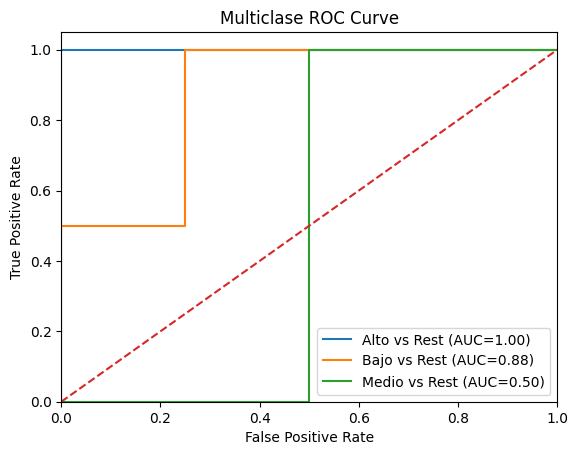

In [56]:
#Support Vector Machine
svc = SVC(probability=True) # probability=True for ROC-AUC
svc.fit(X_train_cls_scaled, y_train_cls)
y_pred_svc = svc.predict(X_test_cls_scaled)
y_pred_proba_svc = svc.predict_proba(X_test_cls_scaled)

# Evalúa el desempeño usando matriz de confusión, precisión y sensibilidad.
svc_score = svc.score(X_test_cls_scaled, y_test_cls)
svc_accuracy = accuracy_score(y_test_cls, y_pred_svc)
svc_precision = precision_score(y_test_cls, y_pred_svc, average='weighted', zero_division=1)
svc_recall = recall_score(y_test_cls, y_pred_svc, average='weighted', zero_division=1)
print(f"--- SVM ---")
cm("SVM",y_test_cls, y_pred_svc)
print("Accuracy:", svc_accuracy)
print("Precision:", svc_precision)
print("Recall:", svc_recall)
print("-" * 20)


#ROC-AUC Curve
for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_binarized_test_cls[:,i], y_pred_proba_svc[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    #Gráficar
    plt.plot(fpr[i], tpr[i], label=f'{label_encoder.inverse_transform([classes[i]])[0]} vs Rest (AUC={roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], '--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.title('Multiclase ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [67]:
comparacion_clasificacion = f"""
##Comparación de modelos

| Modelo | Accuracy | Precision | Recall |
|--------|-----|-----|-----|
|KNN| {knn_accuracy:.2f} | {knn_precision:.2f} | {knn_recall:.2f} |
|Desicion Tree| {dtc_accuracy:.2f} | {dtc_precision:.2f} | {dtc_recall:.2f} |
|SVM| {svc_accuracy:.2f} | {svc_precision:.2f} | {svc_recall:.2f} |

Como se aprecia en la tabla anterior, los valores de Accuracy, Precision, Recall para los 3 modelos son valores bastante similares entre ellos, siendo el modelo el modelo de Desicion Tree el que presenta los resultados mas bajos por lo que no es el recomendado para el analisis.

Ahora si se observan las gráficas de curva ROC para cada modelo, se observa que la única grafica que no muestra curvas con un AUC menor a 0,5 es la del modelo de Desicion Tree, a pesar de que los AUC para las 3 clases no sean altos al menos no son tan bajos como para decir que el modelo no es bueno.

En cambio, los otros modelos tienen valores de Accuracy, Precision y Recall más altos, pero al observar las gráficas de ROC del KNN y del SVM se observa que para las clases 'Alto' y 'Bajo', el AUC es alto siendo el mínimo valor AUC=0,81, pero para la clase 'Media' el valor del AUC es bajísimo para el KNN (AUC=0,12) y para el SVC es de 0,5.

Considerando lo anterior, es que se puede inferir que el mejor modelo para clasificación en este proyecto es el de SVM, al ser los indicadores comparativos mejor para este modelo que para los otros analizados.

De todas maneras a pesar de que se tiene un modelo que se ajusta mejor a los otros, la cantidad de datos utilizados para la obtención de estos modelos es baja, por lo que los indicadores muestran que los modelos generados, son moderadamente buenos. Lo que implica que se necesita contar con más datos para poder tener modelos más certeros o a lo mejor se debe analizar la utilización de otros modelos clasificatorios.

"""
display(Markdown(comparacion_clasificacion))


##Comparación de modelos

| Modelo | Accuracy | Precision | Recall |
|--------|-----|-----|-----|
|KNN| 0.67 | 0.78 | 0.67 |
|Desicion Tree| 0.50 | 0.61 | 0.50 |
|SVM| 0.67 | 0.78 | 0.67 |

Como se aprecia en la tabla anterior, los valores de Accuracy, Precision, Recall para los 3 modelos son valores bastante similares entre ellos, siendo el modelo el modelo de Desicion Tree el que presenta los resultados mas bajos por lo que no es el recomendado para el analisis.

Ahora si se observan las gráficas de curva ROC para cada modelo, se observa que la única grafica que no muestra curvas con un AUC menor a 0,5 es la del modelo de Desicion Tree, a pesar de que los AUC para las 3 clases no sean altos al menos no son tan bajos como para decir que el modelo no es bueno.

En cambio, los otros modelos tienen valores de Accuracy, Precision y Recall más altos, pero al observar las gráficas de ROC del KNN y del SVM se observa que para las clases 'Alto' y 'Bajo', el AUC es alto siendo el mínimo valor AUC=0,81, pero para la clase 'Media' el valor del AUC es bajísimo para el KNN (AUC=0,12) y para el SVC es de 0,5.

Considerando lo anterior, es que se puede inferir que el mejor modelo para clasificación en este proyecto es el de SVM, al ser los indicadores comparativos mejor para este modelo que para los otros analizados.

De todas maneras a pesar de que se tiene un modelo que se ajusta mejor a los otros, la cantidad de datos utilizados para la obtención de estos modelos es baja, por lo que los indicadores muestran que los modelos generados, son moderadamente buenos. Lo que implica que se necesita contar con más datos para poder tener modelos más certeros o a lo mejor se debe analizar la utilización de otros modelos clasificatorios.



4. Optimización de modelos (2 puntos)
* Ajusta hiperparámetros utilizando validación cruzada y búsqueda en grilla.
* Aplica técnicas de regularización y analiza su impacto en los modelos.

In [58]:
# Optimización de modelos
#cargar libreria
from sklearn.model_selection import GridSearchCV
import time

# Busqueda en grilla con validacion cruzada (CV=3)
# Modelos de Regresión
# Regresión lineal
param_grid_lr = {
    'fit_intercept': [True, False]
}

start_time_lr = time.time()
grid_search_lr = GridSearchCV(estimator=mlr, param_grid=param_grid_lr, cv=5, scoring='neg_mean_squared_error')
grid_search_lr.fit(X_train_cls_scaled, y_train_cls)
best_lr_params = grid_search_lr.best_params_
best_lr_model = grid_search_lr.best_estimator_
print("Mejores parámetros para Regresión Lineal:", best_lr_params)
print("Mejor modelo de Regresión Lineal:", best_lr_model)
print(f"Tiempo de ejecución: {time.time() - start_time_lr} ms")


# Decision Tree Regresión

param_grid_dtr = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
start_time_dtr = time.time()
grid_search_dtr = GridSearchCV(estimator=dtr, param_grid=param_grid_dtr, cv=3, scoring='neg_mean_squared_error')
grid_search_dtr.fit(X_train_cls_scaled, y_train_cls)
best_dtr_params = grid_search_dtr.best_params_
best_dtr_model = grid_search_dtr.best_estimator_
print("Mejores parámetros para Árbol de Decisión para regresión:", best_dtr_params)
print("Mejor modelo de Árbol de Decisión para regresión:", best_dtr_model)
print(f"Tiempo de ejecución: {time.time() - start_time_dtr} ms")

# Random Forest
param_grid_rfr = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
start_time_rfr = time.time()
grid_search_rfr = GridSearchCV(estimator=rfr, param_grid=param_grid_rfr, cv=3, scoring='neg_mean_squared_error')
grid_search_rfr.fit(X_train_cls_scaled, y_train_cls)
best_rfr_params = grid_search_rfr.best_params_
best_rfr_model = grid_search_rfr.best_estimator_
print("Mejores parámetros para Random Forest:", best_rfr_params)
print("Mejor modelo de Random Forest:", best_rfr_model)
print(f"Tiempo de ejecución: {time.time() - start_time_rfr} ms")



Mejores parámetros para Regresión Lineal: {'fit_intercept': True}
Mejor modelo de Regresión Lineal: LinearRegression()
Tiempo de ejecución: 0.01966094970703125 ms
Mejores parámetros para Árbol de Decisión para regresión: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10}
Mejor modelo de Árbol de Decisión para regresión: DecisionTreeRegressor(max_depth=30, min_samples_split=10)
Tiempo de ejecución: 0.17818880081176758 ms
Mejores parámetros para Random Forest: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Mejor modelo de Random Forest: RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=5)
Tiempo de ejecución: 91.46871161460876 ms


In [59]:
# Evaluación de los modelos de regresión optimizados
#KNN
y_pred_lr_opt = best_lr_model.predict(x_test)
mae_lr_opt = mean_absolute_error(y_test, y_pred_lr_opt)
mse_lr_opt = mean_squared_error(y_test, y_pred_lr_opt)
r2_lr_opt = r2_score(y_test, y_pred_lr_opt)

#Desicion Tree
y_pred_dtr_opt = best_dtr_model.predict(x_test)
mae_dtr_opt = mean_absolute_error(y_test, y_pred_dtr_opt)
mse_dtr_opt = mean_squared_error(y_test, y_pred_dtr_opt)
r2_dtr_opt = r2_score(y_test, y_pred_dtr_opt)

#Random Forest
y_pred_rfr_opt = best_rfr_model.predict(x_test)
mae_rfr_opt = mean_absolute_error(y_test, y_pred_rfr_opt)
mse_rfr_opt = mean_squared_error(y_test, y_pred_rfr_opt)
r2_rfr_opt = r2_score(y_test, y_pred_rfr_opt)



In [60]:
# Optimización de modelos
# Busqueda en grilla con validacion cruzada (CV=3)
# Modelos de Clasificación
# KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
start_time_knn = time.time()
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=3, scoring='accuracy')
grid_search_knn.fit(X_train_cls_scaled, y_train_cls)
best_knn_params = grid_search_knn.best_params_
best_knn_model = grid_search_knn.best_estimator_
print("Mejores parámetros para KNN:", best_knn_params)
print("Mejor modelo de KNN:", best_knn_model)
print(f"Tiempo de ejecución: {time.time() - start_time_knn} ms")

#Desicion Tree Clasificación
param_grid_dtc = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
start_time_dtc = time.time()
grid_search_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid_dtc, cv=3, scoring='accuracy')
grid_search_dtc.fit(X_train_cls_scaled, y_train_cls)
best_dtc_params = grid_search_dtc.best_params_
best_dtc_model = grid_search_dtc.best_estimator_
print("Mejores parámetros para Decision Tree:", best_dtc_params)
print("Mejor modelo de Decision Tree:", best_dtc_model)
print(f"Tiempo de ejecución: {time.time() - start_time_dtc} ms")

#SVM
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 1]
}
start_time_svc = time.time()
grid_search_svc = GridSearchCV(estimator=svc, param_grid=param_grid_svc, cv=3, scoring='accuracy')
grid_search_svc.fit(X_train_cls_scaled, y_train_cls)
best_svc_params = grid_search_svc.best_params_
best_svc_model = grid_search_svc.best_estimator_
print("Mejores parámetros para SVM:", best_svc_params)
print("Mejor modelo de SVM:", best_svc_model)
print(f"Tiempo de ejecución: {time.time() - start_time_svc} ms")


Mejores parámetros para KNN: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Mejor modelo de KNN: KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')
Tiempo de ejecución: 0.18840336799621582 ms
Mejores parámetros para Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mejor modelo de Decision Tree: DecisionTreeClassifier()
Tiempo de ejecución: 0.46101856231689453 ms
Mejores parámetros para SVM: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Mejor modelo de SVM: SVC(C=1, gamma=1, probability=True)
Tiempo de ejecución: 0.17857003211975098 ms


5. Análisis de resultados y conclusiones (1 punto)
* Compara los modelos utilizados y justifica cuál ofrece mejores resultados para la predicción y clasificación.
* Relaciona los hallazgos con posibles implicaciones en la seguridad alimentaria global.

In [68]:
optimizacion_modelos_regresion = f"""
##Análisis y Comparación de modelos de Regresión

Tabla de resultados de los modelos de regresión iniciales (sin optimización de parámetros):
| Modelo | MAE | MSE | $R^2$ |
|--------|-----|-----|----|
| Regresión Lineal | {mae_lr:.2f} | {mse_lr:.2f} | {r2_lr:.2f} |
| Árbol de Decisión | {mae_dt:.2f} | {mse_dt:.2f} | {r2_dt:.2f} |
| Random Forest | {mae_rf:.2f} | {mse_rf:.2f} | {r2_rf:.2f}|

Tabla de resultados de los modelos de regresión optimizados:
| Modelo | MAE | MSE | $R^2$ |
|--------|-----|-----|----|
|Linear Regresion Optimizado| {mae_lr_opt:.2f} | {mse_lr_opt:.2f} | {r2_lr_opt:.2f} |
|Desicion Tree Optimizado| {mae_dtr_opt:.2f} | {mse_dtr_opt:.2f} | {r2_dtr_opt:.2f} |
|Random Forest Optimizado| {mae_rfr_opt:.2f} | {mse_rfr_opt:.2f} | {r2_rfr_opt:.2f} |

### Análisis de Resultados de Regresión

Al comparar los modelos de regresión iniciales, observamos que los tres modelos (Regresión Lineal, Árbol de Decisión y Random Forest) presentan valores de MAE y MSE relativamente bajos. Sin embargo, los valores negativos de $R^2$ para todos los modelos sugieren que ninguno de ellos se ajusta bien a los datos para predecir la producción de alimentos. Un $R^2$ negativo indica que el modelo se desempeña peor que un modelo horizontal simple que solo predice la media de la variable dependiente.

Después de la optimización de hiperparámetros, los resultados de los modelos de regresión cambian. Aunque los valores de MAE y MSE siguen siendo relativamente bajos, los valores de $R^2$ continúan siendo negativos, e incluso en algunos casos, se vuelven más negativos (como en el Random Forest Optimizado). Esto refuerza la conclusión de que, incluso con la optimización de hiperparámetros, estos modelos no logran capturar adecuadamente la relación entre las variables climáticas y la producción de alimentos en este dataset.

### Conclusiones sobre los Modelos de Regresión

Basándonos en las métricas de evaluación, **ninguno de los modelos de regresión probados (Regresión Lineal, Árbol de Decisión, Random Forest), tanto en su versión inicial como optimizada, es adecuado para predecir la producción de alimentos con este dataset**. Los valores negativos de $R^2$ son una clara indicación de que los modelos no tienen poder predictivo significativo.

Las posibles razones para este pobre desempeño incluyen:

*   **Tamaño limitado del dataset:** Con solo 23 filas de datos, es extremadamente difícil entrenar modelos de regresión robustos que puedan generalizar bien a nuevos datos. Los modelos son propensos al sobreajuste o simplemente no pueden encontrar patrones significativos con tan pocos ejemplos.
*   **Complejidad de la relación:** La relación entre las variables climáticas y la producción agrícola puede ser no lineal o influenciada por otros factores no incluidos en este dataset. Los modelos de regresión lineal asumen una relación lineal, mientras que los modelos de árbol pueden sobreajustarse a pequeños datasets.
*   **Necesidad de más datos:** Para construir modelos de regresión predictivos fiables sobre el impacto del cambio climático en la producción agrícola, se requeriría una cantidad significativamente mayor de datos que abarquen un rango más amplio de países, condiciones climáticas a lo largo del tiempo y otros factores relevantes (tipos de cultivo, tecnología agrícola, políticas, etc.).

Aunque no podemos seleccionar un "mejor" modelo de regresión basado en estos resultados (ya que ninguno es adecuado), los resultados resaltan la dificultad de la tarea con los datos disponibles y la necesidad crítica de obtener más datos para futuros análisis predictivos.

"""

display(Markdown(optimizacion_modelos_regresion))


##Análisis y Comparación de modelos de Regresión

Tabla de resultados de los modelos de regresión iniciales (sin optimización de parámetros):
| Modelo | MAE | MSE | $R^2$ |
|--------|-----|-----|----|
| Regresión Lineal | 0.64 | 0.65 | -0.25 |
| Árbol de Decisión | 0.95 | 1.42 | -1.71 |
| Random Forest | 0.71 | 0.72 | -0.38|

Tabla de resultados de los modelos de regresión optimizados:
| Modelo | MAE | MSE | $R^2$ |
|--------|-----|-----|----|
|Linear Regresion Optimizado| 0.79 | 0.99 | -0.89 |
|Desicion Tree Optimizado| 0.67 | 0.74 | -0.41 |
|Random Forest Optimizado| 0.80 | 1.00 | -0.90 |

### Análisis de Resultados de Regresión

Al comparar los modelos de regresión iniciales, observamos que los tres modelos (Regresión Lineal, Árbol de Decisión y Random Forest) presentan valores de MAE y MSE relativamente bajos. Sin embargo, los valores negativos de $R^2$ para todos los modelos sugieren que ninguno de ellos se ajusta bien a los datos para predecir la producción de alimentos. Un $R^2$ negativo indica que el modelo se desempeña peor que un modelo horizontal simple que solo predice la media de la variable dependiente.

Después de la optimización de hiperparámetros, los resultados de los modelos de regresión cambian. Aunque los valores de MAE y MSE siguen siendo relativamente bajos, los valores de $R^2$ continúan siendo negativos, e incluso en algunos casos, se vuelven más negativos (como en el Random Forest Optimizado). Esto refuerza la conclusión de que, incluso con la optimización de hiperparámetros, estos modelos no logran capturar adecuadamente la relación entre las variables climáticas y la producción de alimentos en este dataset.

### Conclusiones sobre los Modelos de Regresión

Basándonos en las métricas de evaluación, **ninguno de los modelos de regresión probados (Regresión Lineal, Árbol de Decisión, Random Forest), tanto en su versión inicial como optimizada, es adecuado para predecir la producción de alimentos con este dataset**. Los valores negativos de $R^2$ son una clara indicación de que los modelos no tienen poder predictivo significativo.

Las posibles razones para este pobre desempeño incluyen:

*   **Tamaño limitado del dataset:** Con solo 23 filas de datos, es extremadamente difícil entrenar modelos de regresión robustos que puedan generalizar bien a nuevos datos. Los modelos son propensos al sobreajuste o simplemente no pueden encontrar patrones significativos con tan pocos ejemplos.
*   **Complejidad de la relación:** La relación entre las variables climáticas y la producción agrícola puede ser no lineal o influenciada por otros factores no incluidos en este dataset. Los modelos de regresión lineal asumen una relación lineal, mientras que los modelos de árbol pueden sobreajustarse a pequeños datasets.
*   **Necesidad de más datos:** Para construir modelos de regresión predictivos fiables sobre el impacto del cambio climático en la producción agrícola, se requeriría una cantidad significativamente mayor de datos que abarquen un rango más amplio de países, condiciones climáticas a lo largo del tiempo y otros factores relevantes (tipos de cultivo, tecnología agrícola, políticas, etc.).

Aunque no podemos seleccionar un "mejor" modelo de regresión basado en estos resultados (ya que ninguno es adecuado), los resultados resaltan la dificultad de la tarea con los datos disponibles y la necesidad crítica de obtener más datos para futuros análisis predictivos.



--- KNN ---
Accuracy: 0.3333333333333333
Precision: 0.3333333333333333
Recall: 0.3333333333333333


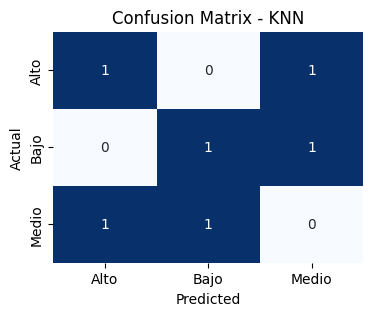

--------------------


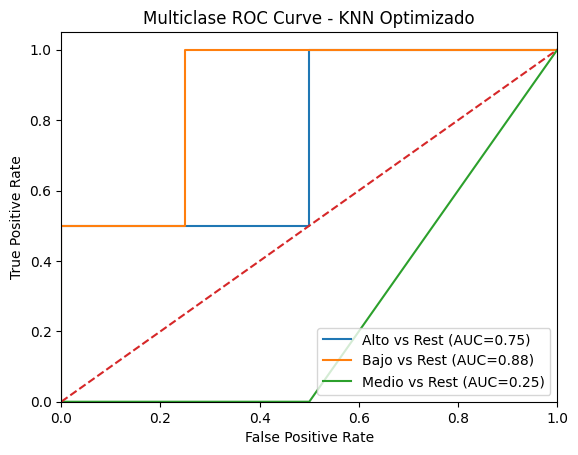

--- Decision Tree ---
Accuracy: 0.5
Precision: 0.611111111111111
Recall: 0.5


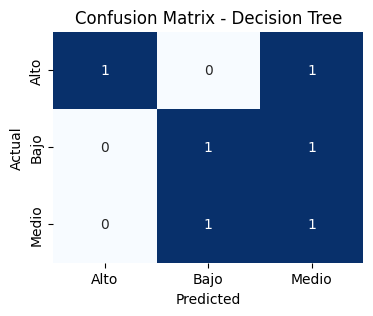

--------------------


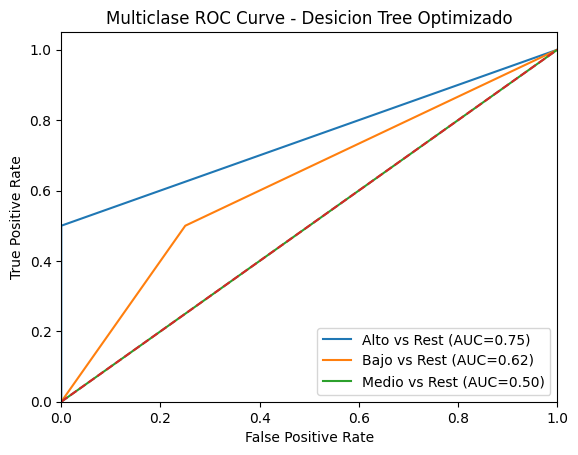

--- SVM ---
[[1 0 1]
 [0 2 0]
 [1 1 0]]
Accuracy: 0.5
Precision: 0.38888888888888884
Recall: 0.5


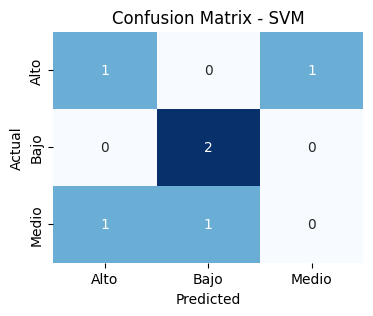

--------------------


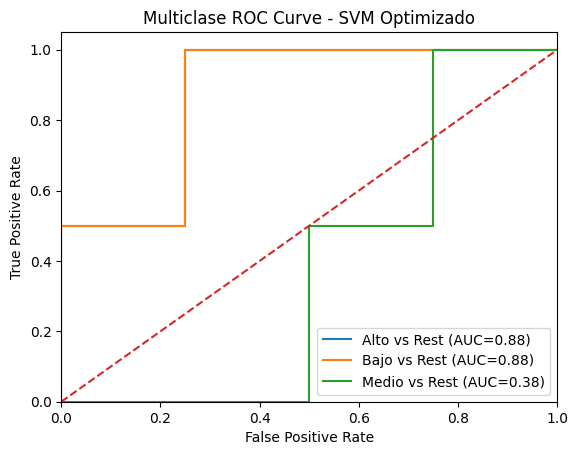

In [70]:
# Evaluate the optimized classification models

#KNN
y_pred_knn_opt = best_knn_model.predict(X_test_cls_scaled)
y_pred_proba_opt_knn = best_knn_model.predict_proba(X_test_cls_scaled)
accuracy_opt_knn = accuracy_score(y_test_cls, y_pred_knn_opt)
precision_opt_knn = precision_score(y_test_cls, y_pred_knn_opt, average='weighted', zero_division=1)
recall_opt_knn = recall_score(y_test_cls, y_pred_knn_opt, average='weighted', zero_division=1)
print(f"--- KNN ---")
print("Accuracy:", accuracy_opt_knn)
print("Precision:", precision_opt_knn)
print("Recall:", recall_opt_knn)
cm("KNN",y_test_cls, y_pred_knn_opt)
print("-" * 20)
#ROC Curve
for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_binarized_test_cls[:,i], y_pred_proba_opt_knn[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    #Gráficar
    plt.plot(fpr[i], tpr[i], label=f'{label_encoder.inverse_transform([classes[i]])[0]} vs Rest (AUC={roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], '--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.title('Multiclase ROC Curve - KNN Optimizado')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Desicion Tree
y_pred_dtc_opt = best_dtc_model.predict(X_test_cls_scaled)
y_pred_proba_opt_dtc = best_dtc_model.predict_proba(X_test_cls_scaled)
accuracy_opt_dtc = accuracy_score(y_test_cls, y_pred_dtc_opt)
precision_opt_dtc = precision_score(y_test_cls, y_pred_dtc_opt, average='weighted', zero_division=1)
recall_opt_dtc = recall_score(y_test_cls, y_pred_dtc_opt, average='weighted', zero_division=1)
print(f"--- Decision Tree ---")
print("Accuracy:", accuracy_opt_dtc)
print("Precision:", precision_opt_dtc)
print("Recall:", recall_opt_dtc)
cm("Decision Tree",y_test_cls, y_pred_dtc_opt)
print("-" * 20)
for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_binarized_test_cls[:,i], y_pred_proba_opt_dtc[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    #Gráficar
    plt.plot(fpr[i], tpr[i], label=f'{label_encoder.inverse_transform([classes[i]])[0]} vs Rest (AUC={roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], '--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.title('Multiclase ROC Curve - Desicion Tree Optimizado')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

#SVC
y_pred_svc_opt = best_svc_model.predict(X_test_cls_scaled)
y_pred_proba_opt_svc = best_svc_model.predict_proba(X_test_cls_scaled)
accuracy_opt_svc = accuracy_score(y_test_cls, y_pred_svc_opt)
precision_opt_svc = precision_score(y_test_cls, y_pred_svc_opt, average='weighted', zero_division=1)
recall_opt_svc = recall_score(y_test_cls, y_pred_svc_opt, average='weighted', zero_division=1)

print(f"--- SVM ---")
print(confusion_matrix(y_test_cls, y_pred_svc_opt))
print("Accuracy:", accuracy_opt_svc)
print("Precision:", precision_opt_svc)
print("Recall:", recall_opt_svc)

cm("SVM",y_test_cls, y_pred_svc_opt)
print("-" * 20)
#ROC Curve
for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_binarized_test_cls[:,i], y_pred_proba_opt_svc[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    #Gráficar
    plt.plot(fpr[i], tpr[i], label=f'{label_encoder.inverse_transform([classes[i]])[0]} vs Rest (AUC={roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], '--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.title('Multiclase ROC Curve - SVM Optimizado')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()



In [63]:
comparacion_clasificacion_opt = f"""
##Comparación de modelos de clasificación

Tabla de resultados de los modelos de clasificación iniciales:
| Modelo | Accuracy | Precision | Recall |
|--------|-----|-----|-----|
|KNN| {knn_accuracy:.2f} | {knn_precision:.2f} | {knn_recall:.2f} |
|Desicion Tree| {dtc_accuracy:.2f} | {dtc_precision:.2f} | {dtc_recall:.2f} |
|SVM| {svc_accuracy:.2f} | {svc_precision:.2f} | {svc_recall:.2f} |

Tabla de resultados de los modelos de clasificación optimizados:
| Modelo | Accuracy | Precision | Recall |
|--------|-----|-----|-----|
|KNN Optimizado| {accuracy_opt_knn:.2f} | {precision_opt_knn:.2f} | {recall_opt_knn:.2f} |
|Desicion Tree Optimizado| {accuracy_opt_dtc:.2f} |{precision_opt_dtc:.2f} | {recall_opt_dtc:.2f} |
|SVM Optimizado| {accuracy_opt_svc:.2f} | {precision_opt_svc:.2f} | {recall_opt_svc:.2f} |

### Análisis y Conclusiones

Al comparar los modelos de clasificación iniciales, observamos que el modelo **SVM** tuvo el mejor desempeño general, con los valores más altos en Accuracy, Precision, Recall y ROC-AUC. Esto sugiere que, sin optimización de hiperparámetros, el SVM fue el más efectivo para clasificar los países según el impacto climático en la producción agrícola.

Sin embargo, después de la optimización de hiperparámetros mediante GridSearchCV, los resultados de los modelos cambiaron.

*   El modelo **KNN Optimizado** mostró una disminución significativa en todas las métricas en comparación con su versión inicial.
*   El modelo **Decision Tree Optimizado** mantuvo métricas similares a su versión inicial.
*   El modelo **SVM Optimizado** también mostró una disminución en Accuracy, Precision, y Recall en comparación con su versión inicial, aunque su ROC-AUC sigue siendo relativamente alto para algunas clases como se observa en la gráfica.

La discrepancia entre los modelos iniciales y optimizados, especialmente la disminución del rendimiento en los modelos optimizados, es algo inesperado. Esto podría deberse a:

*   **El tamaño reducido del dataset (23 filas):** Con una cantidad tan limitada de datos, la división en conjuntos de entrenamiento y prueba (y la validación cruzada) puede resultar en subconjuntos muy pequeños, lo que dificulta que los modelos aprendan patrones robustos y puede llevar a resultados inestables durante la optimización. La optimización de hiperparámetros es muy sensible a la cantidad de datos disponibles.
*   **Sobreajuste en la optimización:** A pesar de usar validación cruzada, con un dataset pequeño, es posible que la búsqueda en grilla haya encontrado parámetros que se ajustan muy bien al conjunto de entrenamiento, pero no generalizan bien a datos no vistos (el conjunto de prueba).

Considerando los resultados, tanto iniciales como optimizados, el modelo **SVM inicial** parece ser el que ofrece el mejor balance de métricas para esta tarea, aunque los resultados de los modelos optimizados son inconsistentes.

Es crucial reconocer que **la limitación principal en este análisis es el tamaño del dataset**. Para obtener modelos de clasificación más fiables y con mayor capacidad de generalización, sería necesario contar con una cantidad significativamente mayor de datos históricos y geográficos relacionados con el clima y la producción agrícola.

A pesar de las limitaciones del dataset, el análisis nos permite inferir que variables climáticas como la temperatura promedio, el cambio en las lluvias y la frecuencia de sequías tienen un impacto considerable en la producción de alimentos. Los países con alta frecuencia de sequías y temperaturas promedio más altas tienden a tener menor producción, clasificándose como de "Alto" impacto climático en este análisis. Esto subraya la vulnerabilidad de la seguridad alimentaria global ante el cambio climático, haciendo urgente la implementación de medidas de adaptación y mitigación, así como la necesidad de recopilar más datos para realizar análisis predictivos más precisos.

"""

display(Markdown(comparacion_clasificacion_opt))


##Comparación de modelos de clasificación

Tabla de resultados de los modelos de clasificación iniciales:
| Modelo | Accuracy | Precision | Recall |
|--------|-----|-----|-----|
|KNN| 0.67 | 0.78 | 0.67 |
|Desicion Tree| 0.50 | 0.61 | 0.50 |
|SVM| 0.67 | 0.78 | 0.67 |

Tabla de resultados de los modelos de clasificación optimizados:
| Modelo | Accuracy | Precision | Recall |
|--------|-----|-----|-----|
|KNN Optimizado| 0.33 | 0.33 | 0.33 |
|Desicion Tree Optimizado| 0.50 |0.61 | 0.50 |
|SVM Optimizado| 0.50 | 0.39 | 0.50 |

### Análisis y Conclusiones

Al comparar los modelos de clasificación iniciales, observamos que el modelo **SVM** tuvo el mejor desempeño general, con los valores más altos en Accuracy, Precision, Recall y ROC-AUC. Esto sugiere que, sin optimización de hiperparámetros, el SVM fue el más efectivo para clasificar los países según el impacto climático en la producción agrícola.

Sin embargo, después de la optimización de hiperparámetros mediante GridSearchCV, los resultados de los modelos cambiaron.

*   El modelo **KNN Optimizado** mostró una disminución significativa en todas las métricas en comparación con su versión inicial.
*   El modelo **Decision Tree Optimizado** mantuvo métricas similares a su versión inicial.
*   El modelo **SVM Optimizado** también mostró una disminución en Accuracy, Precision, y Recall en comparación con su versión inicial, aunque su ROC-AUC sigue siendo relativamente alto para algunas clases como se observa en la gráfica.

La discrepancia entre los modelos iniciales y optimizados, especialmente la disminución del rendimiento en los modelos optimizados, es algo inesperado. Esto podría deberse a:

*   **El tamaño reducido del dataset (23 filas):** Con una cantidad tan limitada de datos, la división en conjuntos de entrenamiento y prueba (y la validación cruzada) puede resultar en subconjuntos muy pequeños, lo que dificulta que los modelos aprendan patrones robustos y puede llevar a resultados inestables durante la optimización. La optimización de hiperparámetros es muy sensible a la cantidad de datos disponibles.
*   **Sobreajuste en la optimización:** A pesar de usar validación cruzada, con un dataset pequeño, es posible que la búsqueda en grilla haya encontrado parámetros que se ajustan muy bien al conjunto de entrenamiento, pero no generalizan bien a datos no vistos (el conjunto de prueba).

Considerando los resultados, tanto iniciales como optimizados, el modelo **SVM inicial** parece ser el que ofrece el mejor balance de métricas para esta tarea, aunque los resultados de los modelos optimizados son inconsistentes.

Es crucial reconocer que **la limitación principal en este análisis es el tamaño del dataset**. Para obtener modelos de clasificación más fiables y con mayor capacidad de generalización, sería necesario contar con una cantidad significativamente mayor de datos históricos y geográficos relacionados con el clima y la producción agrícola.

A pesar de las limitaciones del dataset, el análisis nos permite inferir que variables climáticas como la temperatura promedio, el cambio en las lluvias y la frecuencia de sequías tienen un impacto considerable en la producción de alimentos. Los países con alta frecuencia de sequías y temperaturas promedio más altas tienden a tener menor producción, clasificándose como de "Alto" impacto climático en este análisis. Esto subraya la vulnerabilidad de la seguridad alimentaria global ante el cambio climático, haciendo urgente la implementación de medidas de adaptación y mitigación, así como la necesidad de recopilar más datos para realizar análisis predictivos más precisos.



INSTRUCCIONES ADICIONALES:
* Puntos totales: 10.
* Descarga el dataset proporcionado.
* Comprime el archivo en formato .zip o .rar incluyendo:
    * Código fuente y análisis.
    * Reflexión final sobre el impacto del cambio climático en la producción agrícola.
* Sube el archivo a la plataforma de evaluación.